<a href="https://colab.research.google.com/github/juliablaz2003/UFV_visualizacion/blob/main/Ejercicios%20de%20clase/clase2_18oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA 1

Importamos las bibliotecas necesarias y definimos la URL del archivo CSV para leerlo.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Enlace al archivo CSV en la versión "raw" de GitHub
url = 'https://raw.githubusercontent.com/juliablaz2003/UFV_visualizacion/refs/heads/main/Ejercicios%20de%20clase/datos_ejercicio_ventas.csv?token=GHSAT0AAAAAACY2AYSB5PEXMIGMZHA6PMUAZZOFJXA'

# Leer el archivo CSV directamente desde GitHub
df = pd.read_csv(url, sep = ',')

# Mostrar las primeras filas del DataFrame
df.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


Podemos hacer una exploración inicial para entender mejor la estructura de los datos.

En este caso esta línea de código muestra los nombres de todas las columnas.

In [6]:
print(df.columns)

Index(['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'FORECAST',
       'FORECAST_YEAR', 'AMOUNT'],
      dtype='object')


El resultado muestra que el DataFrame tiene las siguientes columnas:
- COUNTRY: el país donde se registra la venta o predicción.
- SUBBRAND: la sub-marca del producto, como por ejemplo, diferentes versiones de una bebida.
- YEAR y MONTH: el año y el mes en que se registra la venta o la predicción.
- SCENARIO: indica si es un dato de venta real (actual) o una predicción (AI_forecast).
- FORECAST: información sobre el tipo de predicción, asociada a un periodo específico.
- FORECAST_YEAR: el año en que se realizó la predicción.
- AMOUNT: el volumen de ventas en litros.

Esta línea me dice el tipo de dato que es.

In [7]:
print(df.dtypes)

COUNTRY           object
SUBBRAND          object
YEAR               int64
MONTH              int64
SCENARIO          object
FORECAST          object
FORECAST_YEAR    float64
AMOUNT           float64
dtype: object


El resultado nos da:

- COUNTRY y SUBBRAND: Son de tipo object, lo que significa que contienen texto o datos categóricos.
- YEAR y MONTH: Son de tipo int64, lo cual es adecuado para valores enteros, como los años y meses.
- SCENARIO y FORECAST: Son de tipo object, probablemente conteniendo texto que describe el escenario (actual o AI_forecast) y el tipo de predicción.
- FORECAST_YEAR y AMOUNT: Son de tipo float64, lo cual es adecuado para datos numéricos con decimales, como el año de la predicción (si incluye decimales) y el volumen de ventas en litros.

1. Número de filas

Para obtener el número de filas usamos la función *shape* que nos proporciona una tupla con la cantidad de filas y columnas, y [0] selecciona solo el valor de filas.

In [8]:
num_filas = df.shape[0]
print(f"Número de filas: {num_filas}")

Número de filas: 18666


En este caso vemos que el número de filas que hay en el dataset es de 18666.

2. Número de "actuals" y "forecasts"

Para calcular el número de ventas reales y predicciones lo primero es filtrar y contar los registros de cada uno y los filtra por la columna SCENARIO.

In [9]:
num_actuals = df[df['SCENARIO'] == 'actual'].shape[0]
num_forecasts = df[df['SCENARIO'] == 'AI_forecast'].shape[0]

print(f"Número de actuals: {num_actuals}")
print(f"Número de forecasts: {num_forecasts}")

Número de actuals: 900
Número de forecasts: 17766


En este caso vemos que hay 900 registros de ventas reales y 17.766 registros de predicciones enn el conjunto de datos.

3. Horizonte de predicción

El horizonte de predicción es el tiempo que transcurre entre el momento en que se hace una predicción y el momento en el que ocurre el evento que se predijo. En el contexto de ventas o demanda, el horizonte de predicción representa el lapso, medido en meses, entre la fecha en que se hace la predicción y la fecha real en la que se espera que suceda la venta.

In [10]:
norway_7up = df[(df['COUNTRY'] == 'Norway') & (df['SUBBRAND'] == '7up (L3)') & (df['FORECAST'] == 'AI_P02F')]

norway_7up

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
1636,Norway,7up (L3),2023,8,AI_forecast,AI_P02F,2023.0,10440.460773
2433,Norway,7up (L3),2023,5,AI_forecast,AI_P02F,2023.0,11265.176976
2788,Norway,7up (L3),2023,11,AI_forecast,AI_P02F,2023.0,1655.848543
6646,Norway,7up (L3),2023,3,AI_forecast,AI_P02F,2023.0,6678.193437
7044,Norway,7up (L3),2023,10,AI_forecast,AI_P02F,2023.0,0.000000
7223,Norway,7up (L3),2024,5,AI_forecast,AI_P02F,2023.0,4753.377529
7897,Norway,7up (L3),2023,6,AI_forecast,AI_P02F,2023.0,10674.547765
10637,Norway,7up (L3),2024,3,AI_forecast,AI_P02F,2023.0,3861.897766
12308,Norway,7up (L3),2024,4,AI_forecast,AI_P02F,2023.0,994.153833
12317,Norway,7up (L3),2023,7,AI_forecast,AI_P02F,2023.0,11330.754229


In [11]:
norway_7up.shape
print(f'El horizonte de predicción es: {norway_7up.shape[0]}')

El horizonte de predicción es: 18


4. Número de países y de productos

Vamos a contar el número de países únicos en la columna COUNTRY y el número de marcas/productos únicos en la columna SUBBRAND.

In [12]:
# Número de países y productos
num_paises = df['COUNTRY'].nunique()
num_productos = df['SUBBRAND'].nunique()

# Listado de países y productos únicos
paises_unicos = df['COUNTRY'].unique()
productos_unicos = df['SUBBRAND'].unique()

print(f"Número de países: {num_paises}")
print(paises_unicos)
print(f"\nNúmero de productos: {num_productos}")
print(productos_unicos)

Número de países: 9
['Portugal' 'Great Britain' 'Spain' 'Hungary' 'Norway' 'Denmark'
 'Netherlands' 'Italy' 'Czech']

Número de productos: 6
['Lipton (L3)' 'Pepsi Max (L3)' '7up (L3)' 'Pepsi Regular (L3)'
 'Mountain Dew (L3)' '7up Free (L3)']


5. Histórico de actuals/forecast

Para obtener el primer y último registro de los datos de ventas reales lo primero que haremos será filtrar el DataFrame para obtener solo los registros de 'actuals' cogiendo únicamente las columnas relevantes: COUNTRY, SUBBRAND, YEAR, MONTH, SCENARIO, y AMOUNT.

In [13]:
historico_actuals = df[df['SCENARIO'] == 'actual'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'AMOUNT']]

Este paso organiza los datos en historico_actuals en orden ascendente, primero por YEAR y luego por MONTH, esto asuegura que los registros esten ordenados en orden cronológico.

In [14]:
historico_actuals = historico_actuals.sort_values(by=['YEAR', 'MONTH'])

Utilizamos head(1) para seleccionar la primera fila de historico_actuals, correspondiente al registro más antiguo tras ordenar por fecha.

In [15]:
primer_registro = historico_actuals.head(1)

Utilizamos tail(1) para seleccionar la última fila de historico_actuals, correspondiente al registro más reciente tras ordenar por fecha.

In [16]:
ultimo_registro = historico_actuals.tail(1)

 Imprimimos el primer y el último registro de historico_actuals con mensajes descriptivos.

In [17]:
print("Primer registro en 'actuals' (ordenado por fecha):")
print(primer_registro)

print("\nÚltimo registro en 'actuals' (ordenado por fecha):")
print(ultimo_registro)

Primer registro en 'actuals' (ordenado por fecha):
     COUNTRY        SUBBRAND  YEAR  MONTH SCENARIO        AMOUNT
2884   Spain  Pepsi Max (L3)  2023      1   actual  83274.055497

Último registro en 'actuals' (ordenado por fecha):
      COUNTRY        SUBBRAND  YEAR  MONTH SCENARIO        AMOUNT
17720  Norway  Pepsi Max (L3)  2024      8   actual  3.110356e+06


Y esto lo hacemos también para el histórico de forecasts, siguiendo el mismo proceso para encontrar el primer y último registro en términos de fecha en las predicciones (AI_forecast).

In [18]:
# Filtramos el DataFrame para obtener solo los registros de 'AI_forecast'
historico_forecasts = df[df['SCENARIO'] == 'AI_forecast'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'FORECAST', 'FORECAST_YEAR', 'AMOUNT']]

# Ordenamos los registros por FORECAST_YEAR y FORECAST para obtener el orden cronológico de las predicciones
historico_forecasts = historico_forecasts.sort_values(by=['FORECAST_YEAR', 'YEAR', 'MONTH'])

# Obtenemos el primer registro en términos de fecha de predicción
primer_forecast = historico_forecasts.head(1)

# Obtenemos el último registro en términos de fecha de predicción
ultimo_forecast = historico_forecasts.tail(1)

# Mostramos el primer y el último registro en términos de fecha de predicción
print("Primer registro en 'forecasts' (ordenado por fecha):")
print(primer_forecast)

print("\nÚltimo registro en 'forecasts' (ordenado por fecha):")
print(ultimo_forecast)

Primer registro en 'forecasts' (ordenado por fecha):
   COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  FORECAST_YEAR  \
34   Czech  Pepsi Max (L3)  2023      1  AI_forecast    AI_PF         2023.0   

           AMOUNT  
34  317424.378124  

Último registro en 'forecasts' (ordenado por fecha):
       COUNTRY  SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  FORECAST_YEAR  \
18543  Hungary  7up (L3)  2025      5  AI_forecast  AI_P12F         2023.0   

       AMOUNT  
18543     0.0  


6. Cuántas ejecuciones de forecast hay

Para ver cuantas ejecuciones de forecast tiene la base de datos agrupamos los registros filtrados de AI_forecast según los valores de la columna FORECAST.

In [19]:
ejecuciones_por_forecast = df[df['SCENARIO'] == 'AI_forecast'].groupby('FORECAST').size()

# Mostramos los resultados por tipo de forecast
ejecuciones_por_forecast

,0
FORECAST,
AI_P02F,1278
AI_P03F,1278
AI_P04F,1476
AI_P05F,1494
AI_P06F,1422
AI_P07F,1476
AI_P08F,1566
AI_P09F,1566
AI_P10F,1620


7. Forecasts distintos

Para contar cuántos tipos únicos de forecast (FORECAST) existen en el conjunto de datos para los registros de predicción (AI_forecast),  utilizamos .nunique() después de filtrar los datos.

Esto nos dará el número total de valores únicos en la columna FORECAST para las predicciones.

In [20]:
forecast_distintos = df['FORECAST'].nunique()
print(f"Forecasts distintos: {forecast_distintos}")

Forecasts distintos: 12


8. Distribución de ventas realizadas

Podemos hacer un análisis de cómo se distribuyen las ventas por país, mes y año, y por marca.

Distribución de ventas por país:
COUNTRY
Czech            6.384946e+08
Denmark          3.173959e+09
Great Britain    8.427775e+09
Hungary          1.104465e+09
Italy            5.058963e+08
Netherlands      1.831524e+09
Norway           1.858965e+09
Portugal         3.871816e+08
Spain            2.184936e+08
Name: AMOUNT, dtype: float64


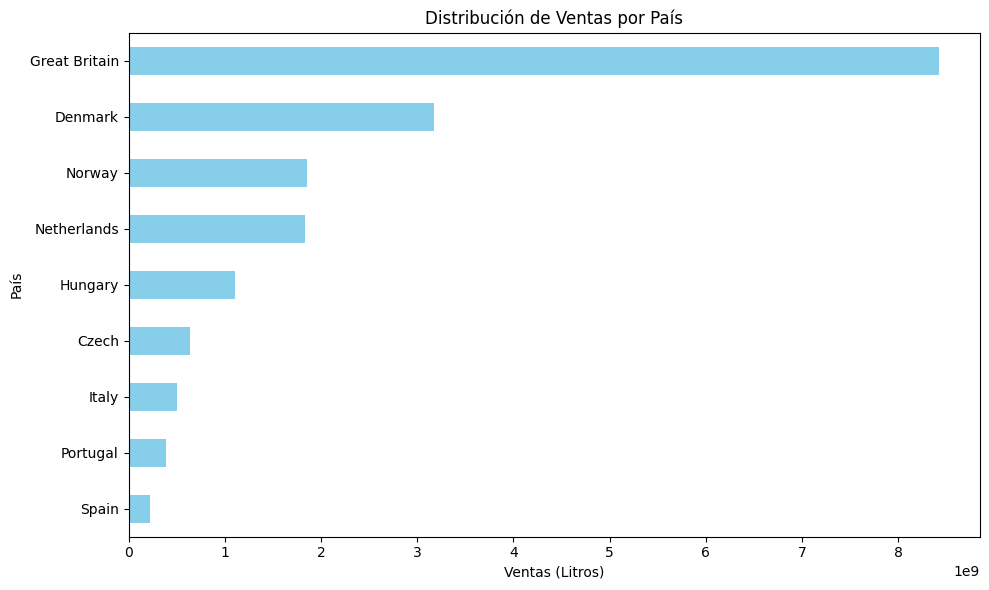

In [21]:
# Distribución de ventas por país
ventas_pais = df.groupby('COUNTRY')['AMOUNT'].sum()

print("Distribución de ventas por país:")
print(ventas_pais)

# Gráfico de la distribución de ventas por país
plt.figure(figsize=(10, 6))
ventas_pais.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribución de Ventas por País')
plt.xlabel('Ventas (Litros)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

La gráfica nos muestra una distribución desigual en el volumen de ventas por país, destacándose Great Britain como el mercado dominante con aproximadamente 8.4 mil millones de litros, muy por encima del resto. Denmark ocupa el segundo lugar con 3.17 mil millones de litros, seguido por Norway y Netherlands, que tienen volúmenes de ventas similares, en torno a 1.8 mil millones cada uno, y luego Hungary con 1.1 mil millones. Por otro lado, Czech e Italy presentan volúmenes más bajos, con 638 y 505 millones de litros respectivamente, mientras que Portugal y Spain tienen las menores ventas, con 387 y 218 millones de litros. Esta diferencia nos sugiere que Great Britain y Denmark concentran gran parte del mercado, mientras que países como Portugal y Spain podrían representar oportunidades para ampliar la participación en ventas, dependiendo de la demanda y de las estrategias comerciales en esas regiones.


Distribución de ventas por mes y año:
YEAR  MONTH
2023  1        9.310165e+07
      2        1.612275e+08
      3        2.696923e+08
      4        3.353694e+08
      5        4.550054e+08
      6        5.304364e+08
      7        6.288473e+08
      8        7.474676e+08
      9        7.679450e+08
      10       7.890140e+08
      11       9.085069e+08
      12       1.049411e+09
2024  1        8.448844e+08
      2        8.408047e+08
      3        1.009033e+09
      4        9.872097e+08
      5        1.065666e+09
      6        1.057691e+09
      7        9.981979e+08
      8        9.357902e+08
      9        7.411355e+08
      10       6.168697e+08
      11       5.632671e+08
      12       5.262705e+08
2025  1        3.783377e+08
      2        2.977278e+08
      3        2.746941e+08
      4        1.780384e+08
      5        9.511169e+07
Name: AMOUNT, dtype: float64


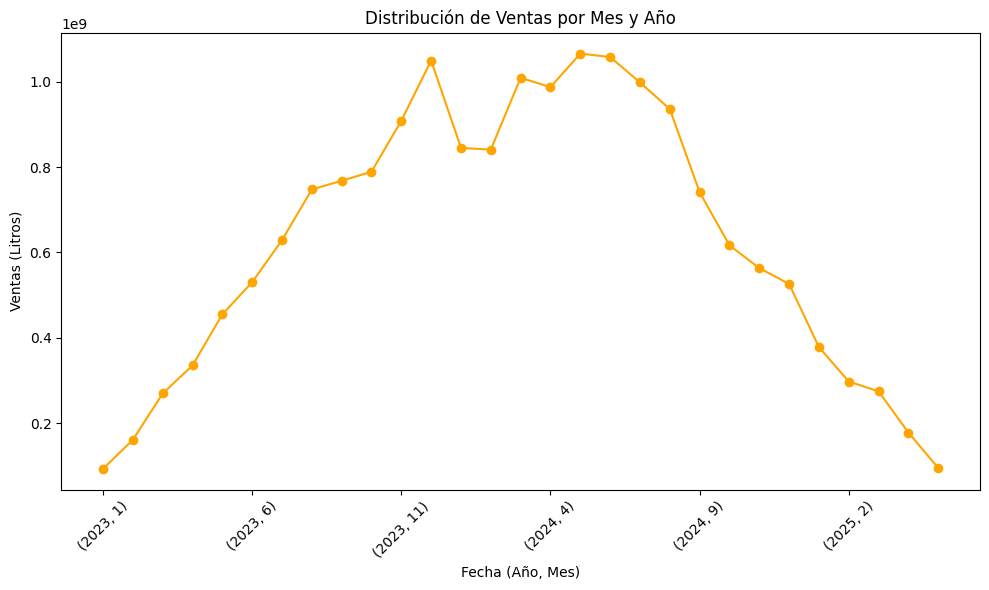

In [22]:
# Distribución de ventas por mes y año
ventas_mes_anio = df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print("\nDistribución de ventas por mes y año:")
print(ventas_mes_anio)

# Gráfico de la distribución de ventas por mes y año
plt.figure(figsize=(10, 6))
ventas_mes_anio.plot(kind='line', marker='o', color='orange')
plt.title('Distribución de Ventas por Mes y Año')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La gráfica muestra un aumento constante en las ventas durante 2023, comenzando en enero con aproximadamente 93 millones de litros y alcanzando un máximo de 1.05 mil millones en diciembre, lo que sugiere un crecimiento de la demanda o estrategias exitosas. En 2024, las ventas se mantienen elevadas y estables en el primer semestre, con un pico en mayo de alrededor de 1.07 mil millones de litros, seguido de un descenso gradual en el segundo semestre, alcanzando 526 millones en diciembre. Este patrón puede reflejar una estacionalidad en la demanda. En 2025, se observa una fuerte caída, con ventas que bajan de 378 millones en enero a 95 millones en mayo, lo que podría indicar un cambio en las condiciones del mercado o en la demanda. En generalpodemos ver que la gráfica sugiere un ciclo de crecimiento y estabilidad, seguido de una disminución.


Distribución de ventas por marca:
SUBBRAND
7up (L3)              2.917746e+08
7up Free (L3)         1.066603e+09
Lipton (L3)           1.682028e+09
Mountain Dew (L3)     1.316731e+08
Pepsi Max (L3)        1.229538e+10
Pepsi Regular (L3)    2.679291e+09
Name: AMOUNT, dtype: float64


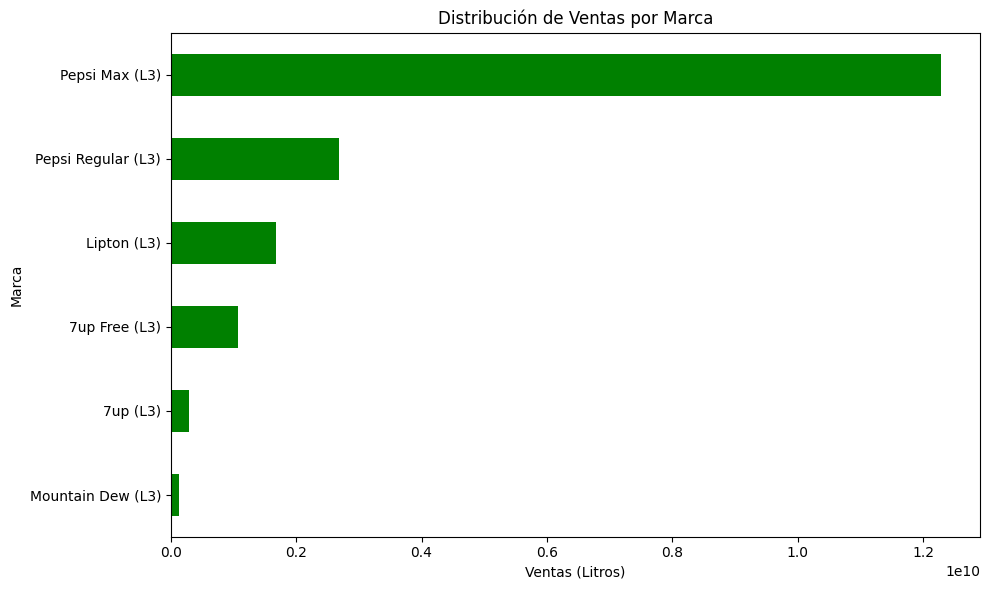

In [23]:
# Distribución de ventas por marca
ventas_marca = df.groupby('SUBBRAND')['AMOUNT'].sum()

print("\nDistribución de ventas por marca:")
print(ventas_marca)

# Gráfico de la distribución de ventas por marca
plt.figure(figsize=(10, 6))
ventas_marca.sort_values().plot(kind='barh', color='green')
plt.title('Distribución de Ventas por Marca')
plt.xlabel('Ventas (Litros)')
plt.ylabel('Marca')
plt.tight_layout()
plt.show()

La gráfica muestra que **Pepsi Max (L3)** es la marca líder en ventas con aproximadamente 12.3 mil millones de litros, destacándose claramente sobre las demás marcas. Le sigue **Pepsi Regular (L3)** con 2.7 mil millones de litros, lo que también la coloca en una posición significativa, aunque distante de Pepsi Max. En el rango medio se encuentran **Lipton (L3)** y **7up Free (L3)** con volúmenes de ventas de 1.7 mil millones y 1.06 mil millones de litros, respectivamente. Las marcas con menor volumen de ventas son **7up (L3)** y **Mountain Dew (L3)**, con 291 millones y 131 millones de litros, respectivamente. Esto sugiere que los productos de Pepsi dominan las ventas, en particular Pepsi Max, mientras que las otras marcas tienen una participación más modesta, posiblemente debido a diferencias en la demanda del consumidor o en las estrategias de mercado para cada producto.

9. Tendencia y estacionalidad

Vamos a analizar la tendencia y estacionalidad de las ventas del país con menos ventas y la marca con más ventas.

Primero agrupamos los datos por país y marca, sumamos las ventas de cada grupo (AMOUNT), y encontramos el país con menos ventas.

Como nos interesa ver cómo cambian las ventas mes a mes, agrupamos las ventas mensuales por año y mes.

In [24]:
# País con menos ventas
pais_menos_ventas = df.groupby('COUNTRY')['AMOUNT'].sum().idxmin()
ventas_pais_menos = df[df['COUNTRY'] == pais_menos_ventas].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print(f"País con menos ventas: {pais_menos_ventas}")

País con menos ventas: Spain


Generamos un gráfico de líneas, que es el más ideal para visualizar como cambian las ventas a lo largo del tiempo, lo que nos permite detectar tendencias y estacionalidad en los datos.

Cada punto representa el volumen de ventas en un mes específico, y las líneas conectan estos puntos para mostrar la evolución temporal.

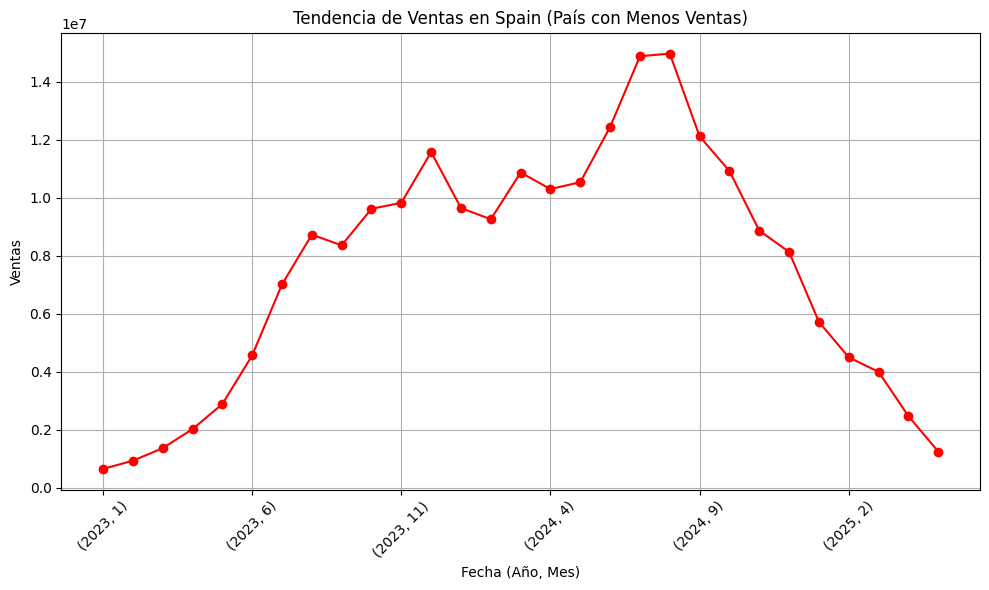

In [25]:
# Gráfico de tendencia para el país con menos ventas
plt.figure(figsize=(10, 6))
ventas_pais_menos.plot(kind='line', marker='o', color='red')
plt.title(f'Tendencia de Ventas en {pais_menos_ventas} (País con Menos Ventas)')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa un crecimiento constante desde enero de 2023, alcanzando su punto máximo en agosto de 2024, seguido de una disminución.

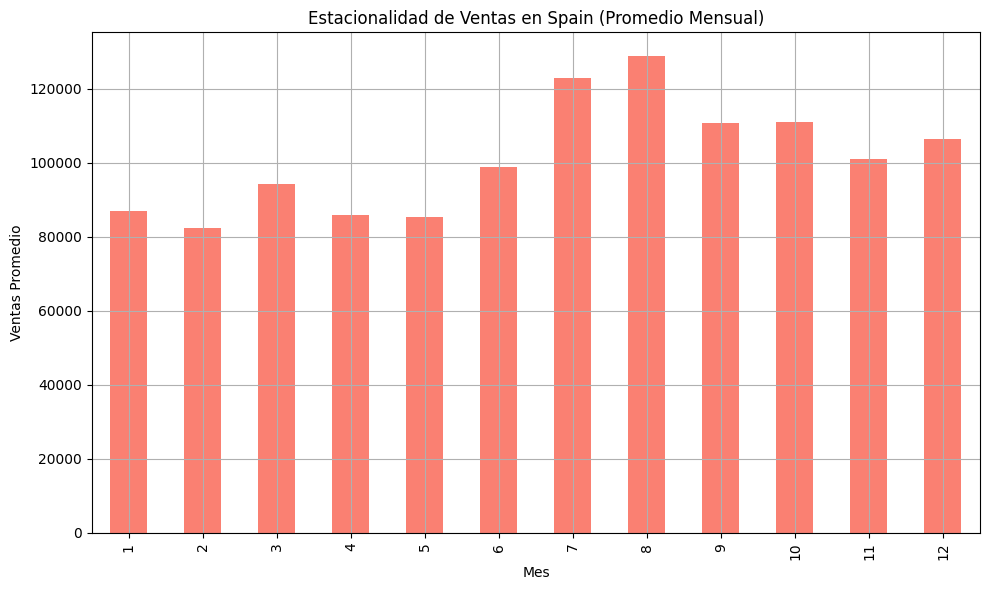

In [26]:
# Gráfico de estacionalidad para el país con menos ventas
ventas_pais_menos_estacionalidad = df[df['COUNTRY'] == pais_menos_ventas].groupby('MONTH')['AMOUNT'].mean()
plt.figure(figsize=(10, 6))
ventas_pais_menos_estacionalidad.plot(kind='bar', color='salmon')
plt.title(f'Estacionalidad de Ventas en {pais_menos_ventas} (Promedio Mensual)')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()


La gráfica de estacionalidad de ventas en **Spain** muestra el promedio mensual de ventas en litros, indicando un patrón consistente a lo largo del año. Observamos que los meses de **junio, julio y agosto** presentan los niveles de ventas más altos, alcanzando un promedio superior a 120,000 litros. Esto sugiere una estacionalidad marcada, posiblemente relacionada con la temporada de verano, cuando la demanda de bebidas suele aumentar. Los meses de **febrero, marzo y diciembre** muestran un promedio de ventas más bajo en comparación, aunque la diferencia con los meses de mayor venta no es extremadamente significativa. En general, la estacionalidad de ventas en **Spain** parece seguir un patrón predecible, con picos en los meses cálidos y una ligera reducción en los meses restantes.

Realizamos los pasos anteriores pero en vez de identificar el país con menos ventas, ahora queremos encontrar la marca con más ventas.

In [ ]:
# Marca con más ventas
marca_mas_ventas = df.groupby('SUBBRAND')['AMOUNT'].sum().idxmax()
ventas_marca_mas = df[df['SUBBRAND'] == marca_mas_ventas].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print(f"Marca con más ventas: {marca_mas_ventas}")

Generamos el gráfico que nos permitirá tener una mejor visualización de la temporalidad.

In [ ]:
# Gráfico de tendencia para la marca con más ventas
plt.figure(figsize=(10, 6))
ventas_marca_mas.plot(kind='line', marker='o', color='blue')
plt.title(f'Tendencia y Estacionalidad de Ventas para {marca_mas_ventas} (Marca con Más Ventas)')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Las ventas de Pepsi Max siguen una tendencia similar, con un aumento desde principios de 2023, alcanzando su máximo a finales de 2023, y luego disminuyendo de manera sostenida.

In [ ]:
# Gráfico de estacionalidad para la marca con más ventas
ventas_marca_mas_estacionalidad = df[df['SUBBRAND'] == marca_mas_ventas].groupby('MONTH')['AMOUNT'].mean()
plt.figure(figsize=(10, 6))
ventas_marca_mas_estacionalidad.plot(kind='bar', color='skyblue')
plt.title(f'Estacionalidad de Ventas para {marca_mas_ventas} (Promedio Mensual)')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio (Litros)')
plt.grid(True)
plt.tight_layout()
plt.show()

La gráfica de estacionalidad de ventas para **Pepsi Max (L3)** muestra el promedio mensual de ventas en litros, con una distribución bastante uniforme a lo largo del año. Los meses de **junio, julio y agosto** presentan un ligero aumento, con ventas promedio cercanas a los 2.5 millones de litros, lo cual podría indicar un aumento en la demanda durante el verano. Sin embargo, la diferencia en ventas entre los meses es moderada, sugiriendo que **Pepsi Max (L3)** tiene una demanda estable y consistente en todas las estaciones. Esta estabilidad podría reflejar una preferencia continua de los consumidores por este producto durante todo el año, sin una marcada estacionalidad, aunque con una leve preferencia en los meses de clima cálido.

10. Predicciones en España y precisión

Queremos comparar las predicciones con las ventas reales específicamente para España.

- AI_forecast indica las predicciones, por eso filtramos esas filas en predicciones_espana.
- actual indica las ventas reales, que almacenamos en ventas_reales_espana.

In [ ]:
predicciones_espana = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'AI_forecast')]
ventas_reales_espana = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'actual')]

Con la función merge combinamos las predicciones con las ventas reales basándonos en: YEAR, MONTH y SUBBRAND

Esto nos asegura que estamos comparando la predicción correcta con la venta real del mismo producto en el mismo periodo de tiempo.

In [ ]:
comparacion_general = pd.merge(predicciones_espana, ventas_reales_espana, on=['YEAR', 'MONTH', 'SUBBRAND'], suffixes=('_pred', '_real'))

Queremos medir la precisión de las predicciones. Para ello calculamos el  error absoluto, que es la diferencia entre la precicción y la venta real, y el error porcentual nos da una idea del tamaño del error relativo a las ventas reales.

In [ ]:
comparacion_general['Error_Absoluto'] = abs(comparacion_general['AMOUNT_pred'] - comparacion_general['AMOUNT_real'])
comparacion_general['Error_Porcentual'] = (comparacion_general['Error_Absoluto'] / comparacion_general['AMOUNT_real']) * 100

Mostramos los resultados de la comparación, incluyendo los valores predichos, los valores reales y los errores.

In [ ]:
comparacion_general[['YEAR', 'MONTH', 'SUBBRAND', 'AMOUNT_pred', 'AMOUNT_real', 'Error_Absoluto', 'Error_Porcentual']].head()

Para comprobar que las predicciones son buenas podemos hacerlo calculando el Error Absoluto Promedio y el Error Porcentual Promedio.

In [ ]:
MAE = comparacion_general['Error_Absoluto'].mean()
MAPE = comparacion_general['Error_Porcentual'].mean()

print(f"Error Absoluto Promedio (MAE): {MAE}")
print(f"Error Porcentual Promedio (MAPE): {MAPE}")

En general, las predicciones son moderadamente precisas, con un error porcentual promedio por debajo del 20%. Esto indica que, aunque las predicciones no son perfectas, están relativamente cerca de las ventas reales en la mayoría de los casos.

También podemos llegar a esta conclusión utilizando gráficos para comparar las predicciones reales contra los valores reales de la siguiente manera.

Filtramos las predicciones y las ventas reales en España

In [ ]:
predicciones_espana = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'AI_forecast')]
ventas_reales_espana = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'actual')]

Combinamos las predicciones y las ventas reales por periodo y producto

In [ ]:
comparacion_general = pd.merge(predicciones_espana, ventas_reales_espana, on=['YEAR', 'MONTH', 'SUBBRAND'], suffixes=('_pred', '_real'))

Calculamos el promedio mensual de las predicciones y ventas reales.

In [ ]:
comparacion_promedio = comparacion_general.groupby(['YEAR', 'MONTH', 'SUBBRAND']).agg(
    AMOUNT_pred=('AMOUNT_pred', 'mean'),
    AMOUNT_real=('AMOUNT_real', 'mean')
).reset_index()

Creamos los gráficos de líneas para cada producto.

In [ ]:
for producto in comparacion_promedio['SUBBRAND'].unique():
    datos_producto = comparacion_promedio[comparacion_promedio['SUBBRAND'] == producto]
    plt.figure(figsize=(10, 6))
    plt.plot(datos_producto['YEAR'].astype(str) + '-' + datos_producto['MONTH'].astype(str),
             datos_producto['AMOUNT_pred'], label='Predicción Promedio', color='blue', marker='o')
    plt.plot(datos_producto['YEAR'].astype(str) + '-' + datos_producto['MONTH'].astype(str),
             datos_producto['AMOUNT_real'], label='Real', color='green', marker='x')
    plt.title(f'Predicciones Promedio vs. Ventas Reales - {producto}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas (Litros)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Los resultados tienen sentido en general, ya que las predicciones promedio siguen la tendencia de las ventas reales en la mayoría de los productos, lo cual indica que el modelo captura bien la dirección general de las ventas. Sin embargo, hay algunas desviaciones notables en ciertos meses, donde las predicciones no coinciden con los picos o valles de las ventas reales; esto podría deberse a eventos específicos (como promociones o factores estacionales) que el modelo no ha considerado.